In [12]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter("runs/mnist")

In [13]:
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [14]:
#MNIST
train_dataset = torchvision.datasets.MNIST(root='./data',train=True,
                transform= transforms.ToTensor() , download = True)

test_dataset = torchvision.datasets.MNIST(root='./data',train=False,
                transform= transforms.ToTensor())

In [15]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size=batch_size,shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,batch_size=batch_size,shuffle=True) 

In [16]:
examples = iter(train_loader)
samples , labels = examples.next()
print(samples.shape , labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


In [17]:
example_data , example_targets = examples.next()

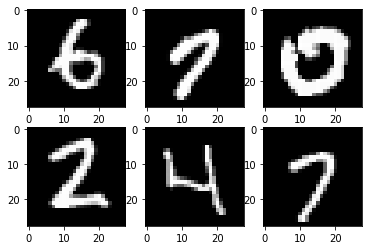

In [19]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0] , cmap = 'gray')
#plt.show()    
img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist images', img_grid)

In [7]:
class NeuralNet(nn.Module):
    def __init__(self, input_size , hidden_size , num_classes):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_classes)
        
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [8]:
model = NeuralNet(input_size,hidden_size,num_classes)

In [9]:
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr=learning_rate)

In [10]:
#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i,(images , labels) in enumerate(train_loader):
        # 100 , 1 , 28 , 28
        # 100 , 784
        images = images.reshape(-1,28*28)
        
        #forward
        outputs = model(images)
        loss = criterion(outputs,labels)
        
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs} , step {i+1}/{n_total_steps}, loss={loss.item():.4f}')
            

#test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images , labels in test_loader:
        images = images.reshape(-1,28*28)
        outputs = model(images)
        #value , index 
        _, predictions = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

epoch 1 / 10 , step 100/600, loss=0.2941
epoch 1 / 10 , step 200/600, loss=0.2960
epoch 1 / 10 , step 300/600, loss=0.3662
epoch 1 / 10 , step 400/600, loss=0.2401
epoch 1 / 10 , step 500/600, loss=0.2615
epoch 1 / 10 , step 600/600, loss=0.2142
epoch 2 / 10 , step 100/600, loss=0.1737
epoch 2 / 10 , step 200/600, loss=0.2472
epoch 2 / 10 , step 300/600, loss=0.1698
epoch 2 / 10 , step 400/600, loss=0.1150
epoch 2 / 10 , step 500/600, loss=0.3662
epoch 2 / 10 , step 600/600, loss=0.3331
epoch 3 / 10 , step 100/600, loss=0.1609
epoch 3 / 10 , step 200/600, loss=0.0888
epoch 3 / 10 , step 300/600, loss=0.1652
epoch 3 / 10 , step 400/600, loss=0.0759
epoch 3 / 10 , step 500/600, loss=0.1666
epoch 3 / 10 , step 600/600, loss=0.2099
epoch 4 / 10 , step 100/600, loss=0.1295
epoch 4 / 10 , step 200/600, loss=0.1727
epoch 4 / 10 , step 300/600, loss=0.0988
epoch 4 / 10 , step 400/600, loss=0.0899
epoch 4 / 10 , step 500/600, loss=0.0433
epoch 4 / 10 , step 600/600, loss=0.1314
epoch 5 / 10 , s